In [1]:
import pandas as pd #Importing pandas library
import numpy as np #Importing numpy library
import matplotlib.pyplot as plt #Importing Matplotlib library's "pyplot"
import seaborn as sns  # Imorting Seaborn library
import os

In [2]:
data = pd.read_csv("parkinsons_updrs.data.csv")
data.drop(["motor_UPDRS"], axis=1, inplace=True)

In [3]:
X = data.drop(["total_UPDRS"], axis=1) 
y = data.total_UPDRS.values

In [4]:
#from sklearn.ensemble import ExtraTreesRegressor
#from sklearn.feature_selection import SelectFromModel
#X.shape
#featsel = ExtraTreesRegressor(n_estimators=50) #might need to change this number
#featsel = featsel.fit(X, y)
#featsel.feature_importances_  
#model = SelectFromModel(featsel, prefit=True)
#X_new = model.transform(X)
#X_new.shape              

In [5]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

array([37.636, 54.232, 26.443, ..., 43.104, 39.136, 27.275])

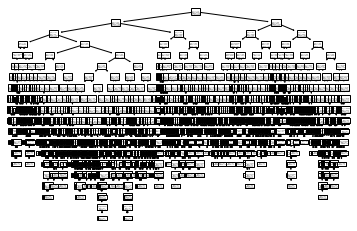

In [6]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

btree = tree.DecisionTreeRegressor()
btree = btree.fit(x_train, y_train)

tree.plot_tree(btree)

btree.predict(x_test)


In [7]:
btree.score(x_test, y_test)

0.9987363620555003

In [8]:
from sklearn.metrics import r2_score  # For find accuracy with R2 Score
from sklearn.metrics import mean_squared_error  # For MSE
from math import sqrt  # For squareroot operation

y_pred_train = btree.predict(x_train)
y_pred_test = btree.predict(x_test)

accuracy_train = r2_score(y_train, y_pred_train)
print("Training Accuracy for Basic Tree: ", accuracy_train)

accuracy_test = r2_score(y_test, y_pred_test)
print("Testing Accuracy for Multiple Basic Tree: ", accuracy_test)

RMSE_train = sqrt(mean_squared_error(y_train, y_pred_train))
print("RMSE for Training Data: ", RMSE_train)

RMSE_test = sqrt(mean_squared_error(y_test, y_pred_test))
print("RMSE for Testing Data: ", RMSE_test)

Training Accuracy for Basic Tree:  1.0
Testing Accuracy for Multiple Basic Tree:  0.9987363620555003
RMSE for Training Data:  1.4188987757311996e-15
RMSE for Testing Data:  0.3753003132924976


In [9]:
true_val = y_train
pred_val = y_pred_train

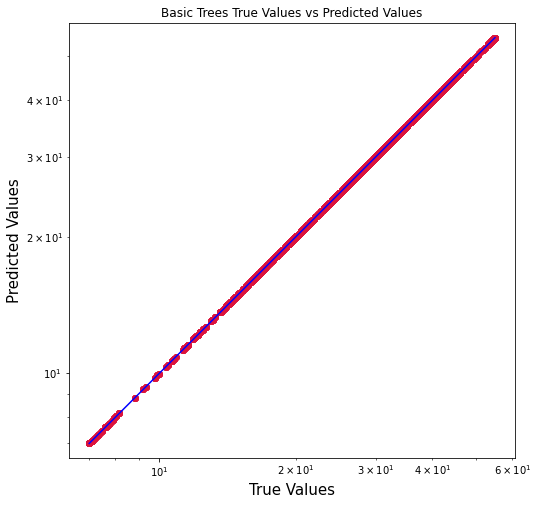

In [11]:
plt.figure(figsize=(8,8))
plt.scatter(true_val, pred_val, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(pred_val), max(true_val))
p2 = min(min(pred_val), min(true_val))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.title("Basic Trees True Values vs Predicted Values")
plt.axis('equal')
plt.show()